In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 200


In [2]:
corpus = ['This has been a rainy weather.',
'Tamil Nadu capital only one with bad weather',
'Animals to get tokens under new regulations set by Tamil Nadu Government',
'Food and nutrition are the way that we get fuel',
'Biriyani is one of the most liked food in India',
'Tiger is the national animal of India',
'Sunny weather is when the sun shines',
'Fox is the smartest among animals']
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})

In [3]:
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,This has been a rainy weather.,weather
1,Tamil Nadu capital only one with bad weather,weather
2,Animals to get tokens under new regulations set by Tamil Nadu Government,animals
3,Food and nutrition are the way that we get fuel,food
4,Biriyani is one of the most liked food in India,food
5,Tiger is the national animal of India,animals
6,Sunny weather is when the sun shines,weather
7,Fox is the smartest among animals,animals


In [4]:
import nltk
import re
stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['rainy weather', 'tamil nadu capital one bad weather',
       'animals get tokens new regulations set tamil nadu government',
       'food nutrition way get fuel', 'biriyani one liked food india',
       'tiger national animal india', 'sunny weather sun shines',
       'fox smartest among animals'], dtype='<U60')

In [16]:
import nltk
from gensim.models import word2vec
tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]
# Set values for various parameters
feature_size = 15 # Word vector dimensionality 
window_context = 20 # Context window size 
min_word_count = 1 # Minimum word count 
sg = 1 # skip-gram model
w2v_model = word2vec.Word2Vec(
    tokenized_corpus,
    window=window_context,
    vector_size=15,
    min_count = min_word_count,
    sg=sg,
    #iter=500
    )
w2v_model.wv['weather'], w2v_model.wv['weather'].shape


(array([-0.00365768,  0.00156271,  0.03423339,  0.06008677, -0.06216973,
        -0.04753025,  0.04324501,  0.05992596, -0.03347398, -0.02513416,
         0.04922994, -0.01016291, -0.03031318,  0.04369932, -0.03252543],
       dtype=float32),
 (15,))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


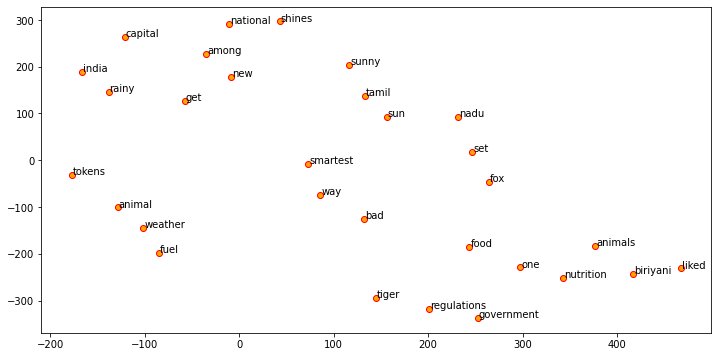

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# visualize embeddings
from sklearn.manifold import TSNE
words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')


In [21]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df.head(20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
weather,-0.003658,0.001563,0.034233,0.060087,-0.062170,-0.047530,0.043245,0.059926,-0.033474,-0.025134,0.049230,-0.010163,-0.030313,0.043699,-0.032525
food,-0.012213,0.019186,0.006821,-0.055327,-0.063112,0.048717,0.033960,0.045082,0.005100,0.042268,-0.022687,-0.006213,0.038451,-0.050220,-0.026285
tamil,-0.050110,-0.006236,0.063650,-0.048771,-0.015615,-0.012913,0.053891,-0.039493,0.000254,-0.031714,-0.063978,0.033416,-0.058407,-0.029336,-0.000197
nadu,-0.001966,-0.051056,0.064125,0.033202,0.061547,-0.054387,0.030009,-0.027577,0.005489,0.056610,-0.029738,0.030115,-0.045244,-0.023650,0.062647
one,-0.010518,0.002142,-0.027604,-0.051218,-0.010053,0.016465,-0.005920,0.036891,-0.018287,0.015067,0.036372,0.055640,-0.009692,-0.061388,0.029137
animals,0.003805,0.049596,-0.005326,-0.017579,-0.058344,-0.005763,0.018915,0.035995,0.046991,-0.038066,0.012381,0.040605,-0.032010,-0.020703,0.045295
india,0.010877,0.001266,0.023158,0.001452,0.064126,0.033737,-0.059449,-0.046944,0.006010,0.042617,-0.057465,0.024438,0.034599,0.038280,0.049779
get,-0.041236,0.007358,0.040592,-0.018922,-0.041399,-0.002842,-0.055589,-0.037202,0.047338,0.022256,0.048281,0.045447,0.050159,-0.025305,-0.003816
government,0.015656,-0.030127,0.055925,-0.065721,0.045098,0.019429,-0.032886,0.029321,-0.011597,0.044743,0.066432,-0.029083,-0.003996,-0.037971,0.025672
capital,0.018562,0.045956,0.040717,0.063535,0.061814,0.052622,-0.046551,-0.061049,-0.002335,-0.020709,0.052612,0.039632,-0.010288,0.010072,0.011899


In [22]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, 
columns=words)
similarity_df.head(10)


,weather,food,tamil,nadu,one,animals,india,get,government,capital,...,biriyani,liked,tiger,national,animal,sunny,sun,shines,fox,rainy
weather,1.000000,-0.091104,-0.050532,-0.097815,-0.211935,0.190390,-0.657960,-0.190150,-0.216089,-0.145126,...,0.025173,-0.195861,-0.353358,-0.109707,0.552489,0.099858,-0.338260,-0.165344,0.320748,-0.404418
food,-0.091104,1.000000,0.142795,-0.354476,0.404205,0.228686,-0.256966,0.196729,0.147217,-0.516759,...,0.005489,0.055874,0.187430,-0.005904,-0.337337,0.285040,-0.319606,-0.289874,-0.014232,-0.061226
tamil,-0.050532,0.142795,1.000000,0.375485,0.043704,0.239538,-0.083126,0.010493,-0.129091,-0.181654,...,0.010396,-0.118596,-0.116204,-0.075022,-0.081124,0.450362,0.659429,0.133277,-0.072304,0.231625
nadu,-0.097815,-0.354476,0.375485,1.000000,-0.059173,-0.158628,0.343947,-0.076406,0.205715,0.111509,...,-0.042749,-0.413065,0.162154,-0.492619,-0.178210,0.149723,0.436336,0.041996,0.372288,0.155880
one,-0.211935,0.404205,0.043704,-0.059173,1.000000,0.440600,-0.202983,0.248988,0.411191,-0.128832,...,0.443500,0.305299,0.389673,-0.169409,-0.290054,0.114023,-0.039750,-0.587214,0.304982,-0.356660
animals,0.190390,0.228686,0.239538,-0.158628,0.440600,1.000000,-0.384612,0.158587,-0.175530,-0.113833,...,0.569997,0.466165,-0.251129,-0.285460,0.065923,-0.029127,-0.095635,-0.341058,0.011192,-0.335631
india,-0.657960,-0.256966,-0.083126,0.343947,-0.202983,-0.384612,1.000000,0.136638,0.109007,0.429078,...,-0.222964,-0.025146,0.236869,0.153966,-0.215422,-0.177796,0.178597,0.204621,-0.148937,0.513725
get,-0.190150,0.196729,0.010493,-0.076406,0.248988,0.158587,0.136638,1.000000,0.208891,0.224439,...,0.279215,0.101369,-0.072670,0.049424,-0.194189,0.232021,-0.341903,-0.181782,0.063868,0.450189
government,-0.216089,0.147217,-0.129091,0.205715,0.411191,-0.175530,0.109007,0.208891,1.000000,0.081719,...,0.130127,-0.004164,0.169143,-0.281586,0.114626,0.015408,-0.153464,-0.189392,0.345525,-0.147392
capital,-0.145126,-0.516759,-0.181654,0.111509,-0.128832,-0.113833,0.429078,0.224439,0.081719,1.000000,...,0.122948,0.053154,0.063974,0.206189,0.121834,-0.315140,0.081424,0.025113,0.129826,0.149501


In [23]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values) [1:4]], axis=1)

weather                   [animal, fuel, way]
food                        [one, bad, sunny]
tamil                       [sun, new, sunny]
nadu                          [set, sun, bad]
one            [nutrition, biriyani, animals]
animals          [biriyani, nutrition, liked]
india                 [rainy, capital, among]
get                   [new, rainy, nutrition]
government            [regulations, one, fox]
capital              [among, india, smartest]
bad                        [tiger, way, nadu]
tokens                 [animal, liked, india]
new                       [among, tamil, get]
regulations          [tiger, government, one]
set                          [fox, nadu, sun]
among                [new, national, capital]
smartest                      [sun, way, new]
nutrition              [one, biriyani, liked]
way                  [bad, weather, smartest]
fuel                  [weather, sunny, tiger]
biriyani          [liked, nutrition, animals]
liked          [biriyani, nutritio